In [29]:
# -----------------------------------------------
# タイタニックデータビューイング
# -----------------------------------------------

In [30]:
# -------------------------------------------------------------------
# ライブラリの読込
# -------------------------------------------------------------------
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
from pandas import Series, DataFrame

import scipy as sp
import seaborn as sns
sns.set()

import sklearn
import unicodedata

%matplotlib inline
%precision 3

'%.3f'

In [31]:
plt.rcParams['font.family'] = 'IPAexGothic'

In [32]:
print(mpl.get_configdir())
print(mpl.matplotlib_fname())

/root/.config/matplotlib
/usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [33]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 300)

In [34]:
pd.options.display.float_format = '{:.6f}'.format

In [35]:
# -----------------------------------------------
# タイタニックデータ 読み込み
# -----------------------------------------------

In [36]:
raw_path = '../data/raw/'

In [37]:
# -------------------------------------------------------------------
# 学習データを読み込み
# -------------------------------------------------------------------
train = pd.read_csv(raw_path + 'train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S


In [39]:
# --------------------------------------------------------------------------------------
# 学習データ情報
# （欠損なし） PassengerId, Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Fare 
# （欠損あり） Age,Cabin,Embarked  
# --------------------------------------------------------------------------------------

In [57]:
survived = train['Survived'].value_counts().rename({0:'死亡', 1:'生存'})
print(survived)

死亡    549
生存    342
Name: Survived, dtype: int64


<BarContainer object of 2 artists>

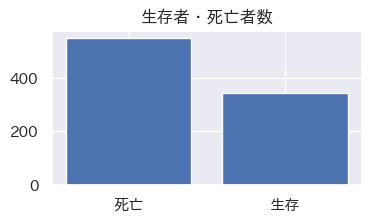

In [85]:
plt.figure(figsize=(4, 2))
plt.title('生存者・死亡者数')
plt.bar(survived.index, survived)


In [55]:
sex = train['Sex'].value_counts().rename({'male':'男性', 'female':'女性'})
print(sex)

男性    577
女性    314
Name: Sex, dtype: int64


<BarContainer object of 2 artists>

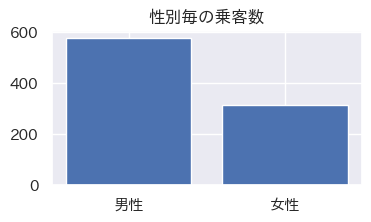

In [84]:
plt.figure(figsize=(4, 2))
plt.title('性別毎の乗客数')
plt.bar(sex.index, sex)


In [54]:
pclass = train['Pclass'].value_counts().sort_index().rename({3:'三等', 2:'二等', 1:'一等'})
print(pclass)

一等    216
二等    184
三等    491
Name: Pclass, dtype: int64


<BarContainer object of 3 artists>

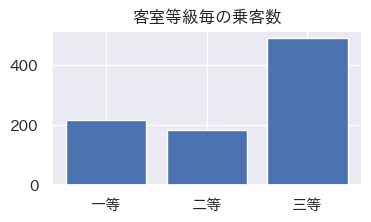

In [83]:
plt.figure(figsize=(4, 2))
plt.title('客室等級毎の乗客数')
plt.bar(pclass.index, pclass)

In [77]:
age = train['Age'].value_counts().sort_index()
print(age)

0.420000      1
0.670000      1
0.750000      2
0.830000      2
0.920000      1
1.000000      7
2.000000     10
3.000000      6
4.000000     10
5.000000      4
6.000000      3
7.000000      3
8.000000      4
9.000000      8
10.000000     2
11.000000     4
12.000000     1
13.000000     2
14.000000     6
14.500000     1
15.000000     5
16.000000    17
17.000000    13
18.000000    26
19.000000    25
20.000000    15
20.500000     1
21.000000    24
22.000000    27
23.000000    15
23.500000     1
24.000000    30
24.500000     1
25.000000    23
26.000000    18
27.000000    18
28.000000    25
28.500000     2
29.000000    20
30.000000    25
30.500000     2
31.000000    17
32.000000    18
32.500000     2
33.000000    15
34.000000    15
34.500000     1
35.000000    18
36.000000    22
36.500000     1
37.000000     6
38.000000    11
39.000000    14
40.000000    13
40.500000     2
41.000000     6
42.000000    13
43.000000     5
44.000000     9
45.000000    12
45.500000     2
46.000000     3
47.00000

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

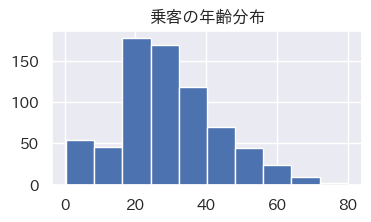

In [87]:
plt.figure(figsize=(4, 2))
plt.title('乗客の年齢分布')
plt.hist(train['Age'])

In [74]:
# なぜか年齢が小数点の乗客が存在する

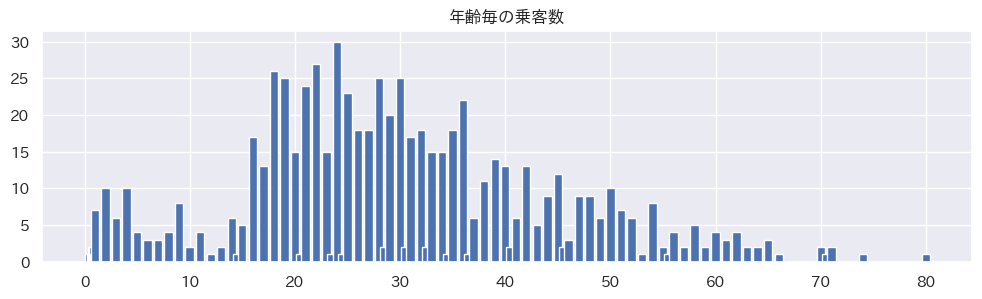

In [75]:
plt.figure(figsize=(12, 3))
plt.title('年齢毎の乗客数')
plt.bar(age.index, age)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.   ,  25.616,  51.233,  76.849, 102.466, 128.082, 153.699,
        179.315, 204.932, 230.548, 256.165, 281.781, 307.398, 333.014,
        358.63 , 384.247, 409.863, 435.48 , 461.096, 486.713, 512.329]),
 <BarContainer object of 20 artists>)

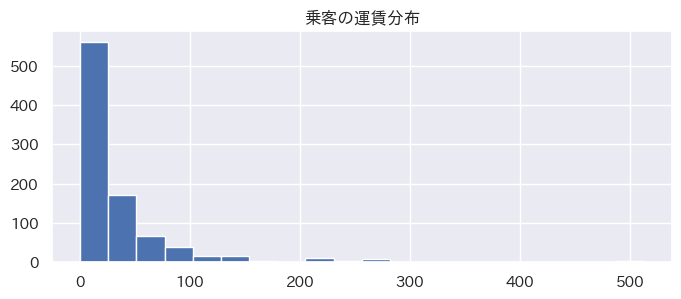

In [89]:
plt.figure(figsize=(8, 3))
plt.title('乗客の運賃分布')
plt.hist(train['Fare'], bins=20)

In [105]:
# 料金が0の謎の乗客が15名いる
train.loc[train['Fare']==0]

15

(array([ 15.,   0.,   0.,   0.,   0.,   2., 167., 183., 108.,  59., 117.,
         65.,  46.,  39.,  39.,  20.,  11.,  17.,   0.,   3.]),
 array([0.   , 0.136, 0.271, 0.407, 0.542, 0.678, 0.813, 0.949, 1.084,
        1.22 , 1.355, 1.491, 1.626, 1.762, 1.897, 2.033, 2.168, 2.304,
        2.439, 2.575, 2.71 ]),
 <BarContainer object of 20 artists>)

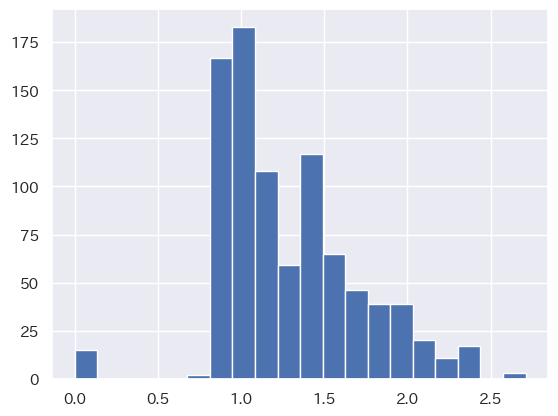

In [99]:
train['Fare_log10'] = np.log10(train['Fare']+1)  # 0の客がいるので+1して対数を取る
plt.hist(train['Fare_log10'], bins=20)

In [43]:
# -------------------------------------------------------------------
# 評価データを読み込み
# -------------------------------------------------------------------
test = pd.read_csv(raw_path + 'test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
# --------------------------------------------------------------------------------------
# 評価データ情報
# （欠損なし） PassengerId, Pclass, Name, Sex, SibSp, Parch, Ticket, Embarked
# （欠損あり） Age, Fare, Cabin
# --------------------------------------------------------------------------------------